In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [2]:
df=pd.read_csv("golf.csv")
df

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Hot,High,Strong,No
1,Overcast,Mild,High,Strong,Yes
2,Overcast,Hot,Normal,Weak,Yes
3,Sunny,Mild,High,Weak,No
4,Rainy,Cool,Normal,Weak,Yes
...,...,...,...,...,...
145,Sunny,Hot,High,Strong,No
146,Overcast,Mild,High,Strong,Yes
147,Rainy,Cool,Normal,Strong,No
148,Rainy,Cool,Normal,Weak,Yes


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
label_encoder = LabelEncoder()
df['Outlook'] = label_encoder.fit_transform(df['Outlook'])
df['Temperature'] = label_encoder.fit_transform(df['Temperature'])
df['Humidity'] = label_encoder.fit_transform(df['Humidity'])
df['Wind'] = label_encoder.fit_transform(df['Wind'])
df['PlayGolf'] = label_encoder.fit_transform(df['PlayGolf'])

# Separate features and target variable
X = df.drop(columns=["PlayGolf"])
y = df["PlayGolf"]

In [5]:
df

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,2,1,0,0,0
1,0,2,0,0,1
2,0,1,1,1,1
3,2,2,0,1,0
4,1,0,1,1,1
...,...,...,...,...,...
145,2,1,0,0,0
146,0,2,0,0,1
147,1,0,1,0,0
148,1,0,1,1,1


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [7]:
G_NB=GaussianNB()
G_NB.fit(X_train,y_train)

GaussianNB()

In [8]:
y_preds=G_NB.predict(X_test)



In [9]:
X_test

,Outlook,Temperature,Humidity,Wind
73,2,2,1,0
18,1,2,0,0
118,0,0,1,0
78,2,2,0,1
76,0,1,1,1
31,2,1,0,1
64,2,2,1,0
141,2,2,1,0
68,1,2,0,1
82,0,2,0,0


In [10]:
G_NB.classes_

array([0, 1])

In [11]:
y_preds

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1])

In [12]:
X_test.shape

(45, 4)

In [13]:
new_data=pd.DataFrame({
    'Outlook':[0],
    'Temperature':[1],
    'Humidity':[0],
    'Wind':[0]
})
G_NB.predict(new_data)

array([1])

In [14]:
from sklearn import metrics
cf=metrics.confusion_matrix(y_test,y_preds)
cf

array([[18,  2],
       [ 8, 17]], dtype=int64)

In [15]:
from sklearn.metrics import accuracy_score
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=G_NB.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_preds))

Train data accuracy: 0.8095238095238095
Test data accuracy: 0.7777777777777778


In [16]:
scores=cross_val_score(G_NB,X_train,y_train,cv=5,scoring='accuracy')
accuracy=scores.mean()
accuracy

0.819047619047619

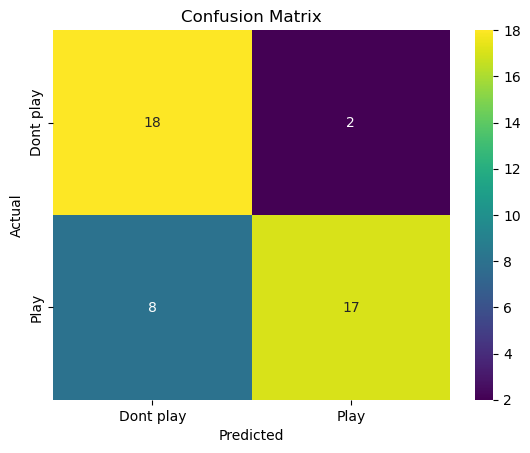

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf, annot=True, cmap='viridis', fmt='g')


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Dont play', 'Play'])  
plt.yticks(ticks=[0.5, 1.5], labels=['Dont play', 'Play']) 
plt.show()